# Sweeping over a range of squeezing parameters

04 December 2025

Santi

In [1]:
# import two_atom_interaction.py
from two_atom_interaction import *

## Cs-Cs

### Initialize experiment configuration

In [150]:
pixel_to_um = 0.67 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# Experiment configuration
cfg = ExperimentConfig(
    atom1 = Cesium(),
    mass_atom1 = Cesium().mass,
    n_atom1 = 54,  # Cs Rydberg n
    wavelength_nm_atom1 = 1064,  # Cs tweezer wavelength

    R_mean_um = 5.6 * pixel_to_um,  # mean interatomic distance in microns (5.6 -> 10MHz) (8.0 -> 1MHz) (5.6 -> 5MHz)
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 0.5e6 * np.sqrt(2),  # Cs Rabi frequency (Hz) adding sqrt(2) for blockade enhancement
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive]
    t_pi_atom2_us = 1 / (2*np.sqrt(2)*0.5e6) * 1e6, # time to do pi pulse on atom2 (us) adding sqrt(2) for blockade enhancement

    Delta_scan_Hz = np.linspace(8, 12, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (0.0, 0.0, 0.0),
    T_uK_atom2 = (0.0, 0.0, 0.0),

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (110e3, 110e3, 20e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (110e3, 110e3, 20e3),

    load_factor = np.sqrt(1), #np.sqrt(0.1),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Cs
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 500,  # number of Monte Carlo samples per detuning
    N_steps = 100,  # number of time steps in evolution

    load_depth_T_atom1 = 95, # uK
    load_depth_T_atom2 = 95, # uK

    plot_displacements = False,  # whether to plot displacement histogram
    simulate_atom1_recapture=True,
    simulate_atom2_recapture=True,

    squeeze_factor = (1.0, 1.0, 1.0), # squeezing in (x, y, z) directions

    hamiltonian_on = True
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Cs 54S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Cs 54S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -28.064532947562324 GHz·μm^6
C6 (Cs 54S - Cs 54S) = 1.763e+11 rad/s·μm^6
C6 (Cs 54S - Cs 54S) = 28.065 GHz·μm^6
time for C6 calculation: 0.1 s



Simulating for squeeze factor = 1.00...
Starting detuning scan...
  Point 2/20 - Elapsed: 0.8s, Est. remaining: 7.4s
  Point 4/20 - Elapsed: 2.4s, Est. remaining: 9.6s
  Point 6/20 - Elapsed: 4.0s, Est. remaining: 9.3s
  Point 8/20 - Elapsed: 5.5s, Est. remaining: 8.3s
  Point 10/20 - Elapsed: 7.1s, Est. remaining: 7.1s
  Point 12/20 - Elapsed: 8.6s, Est. remaining: 5.7s
  Point 14/20 - Elapsed: 10.1s, Est. remaining: 4.3s
  Point 16/20 - Elapsed: 11.6s, Est. remaining: 2.9s
  Point 18/20 - Elapsed: 13.2s, Est. remaining: 1.5s
  Point 20/20 - Elapsed: 14.8s, Est. remaining: 0.0s
time for simulation: 15.6 s


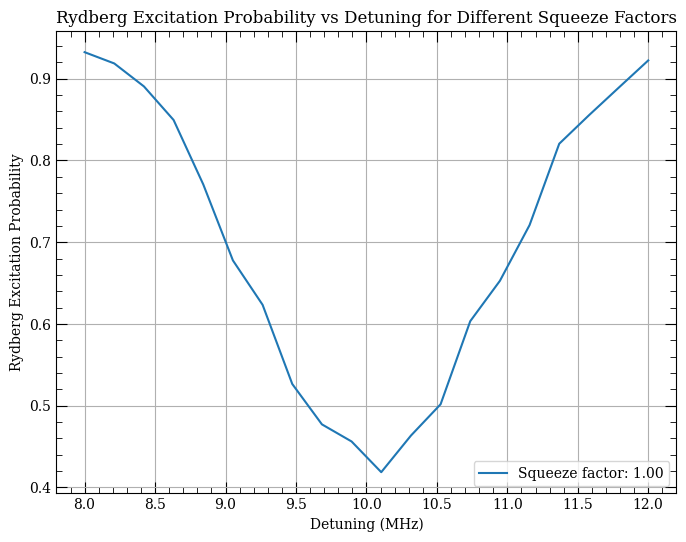

In [147]:
# sweep over squeezing factors and simulate interaction peak
squeeze_factors = [1]#np.array([0.2, 0.5, 1.0, 2.0, 5.0]) #  np.linspace(1.0, 2.0, 10) # np.arange(0.0, 5, 0.5) #
results = []

for factor in squeeze_factors:
    start_time = time.time()
    print(f"\nSimulating for squeeze factor = {factor:.2f}...")
    cfg.squeeze_factor = (factor, factor, 1.0)  # squeezing in (x, y, z) directions
    d, P = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    results.append((factor, d, P))
    print(f"time for simulation: {time.time() - start_time:.1f} s")

# Plot results
plt.figure(figsize=(8,6))
for factor, d, P in results:
    plt.plot(d/1e6, P, label=f"Squeeze factor: {factor:.2f}")
plt.xlabel("Detuning (MHz)")
plt.ylabel("Rydberg Excitation Probability")
plt.title("Rydberg Excitation Probability vs Detuning for Different Squeeze Factors")
plt.legend(loc='lower right')
plt.grid()
plt.show()


Simulating for load factor = 2.00...
Starting detuning scan...


/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/Ni lab/two atom rydberg interaction/two_atom_interaction.py:326: RuntimeWarning: divide by zero encountered in scalar divide
  nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)


  Point 2/30 - Elapsed: 0.8s, Est. remaining: 11.9s
  Point 4/30 - Elapsed: 2.5s, Est. remaining: 16.4s
  Point 6/30 - Elapsed: 4.2s, Est. remaining: 16.7s
  Point 8/30 - Elapsed: 5.8s, Est. remaining: 15.9s
  Point 10/30 - Elapsed: 7.4s, Est. remaining: 14.8s
  Point 12/30 - Elapsed: 9.0s, Est. remaining: 13.5s
  Point 14/30 - Elapsed: 10.6s, Est. remaining: 12.1s
  Point 16/30 - Elapsed: 12.2s, Est. remaining: 10.7s
  Point 18/30 - Elapsed: 13.8s, Est. remaining: 9.2s
  Point 20/30 - Elapsed: 15.4s, Est. remaining: 7.7s
  Point 22/30 - Elapsed: 17.0s, Est. remaining: 6.2s
  Point 24/30 - Elapsed: 18.6s, Est. remaining: 4.7s
  Point 26/30 - Elapsed: 20.2s, Est. remaining: 3.1s
  Point 28/30 - Elapsed: 21.9s, Est. remaining: 1.6s
  Point 30/30 - Elapsed: 23.6s, Est. remaining: 0.0s
time for simulation: 24.5 s

Simulating for load factor = 3.00...
Starting detuning scan...
  Point 2/30 - Elapsed: 0.8s, Est. remaining: 11.6s
  Point 4/30 - Elapsed: 2.5s, Est. remaining: 16.3s
  Point 6/3

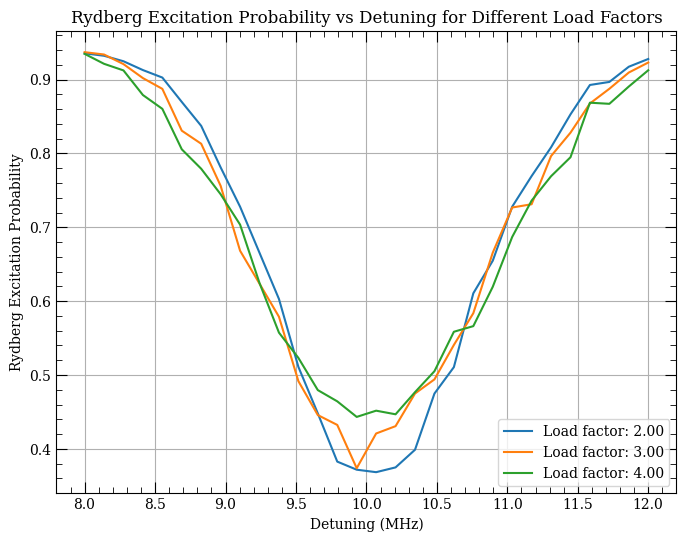

In [152]:
# no squeezing, only sweep the load factor variable

load_factors = np.linspace(2.0, 4.0, 3)
results = []

for factor in load_factors:
    start_time = time.time()
    print(f"\nSimulating for load factor = {factor:.2f}...")
    cfg.load_factor = factor
    d, P = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    results.append((factor, d, P))
    print(f"time for simulation: {time.time() - start_time:.1f} s")

# Plot results
plt.figure(figsize=(8,6))
for factor, d, P in results:
    plt.plot(d/1e6, P, label=f"Load factor: {factor:.2f}")
plt.xlabel("Detuning (MHz)")
plt.ylabel("Rydberg Excitation Probability")
plt.title("Rydberg Excitation Probability vs Detuning for Different Load Factors")
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Na-Na

### Initialize experiment configuration

In [102]:
pixel_to_um = 0.67 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# Experiment configuration
cfg = ExperimentConfig(
    atom2 = Sodium(),
    mass_atom2 = Sodium().mass,
    n_atom2 = 51,  # Na Rydberg n
    wavelength_nm_atom2 = 616,  # Na tweezer wavelength

    R_mean_um = 6 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 0.5e6 * np.sqrt(2),  # Na Rabi frequency (Hz) adding sqrt(2) for blockade enhancement
    OMEGA_atom2_Hz = 0,  # Na Rabi frequency (Hz) [no Na drive]
    t_pi_atom2_us = 1 / (2*np.sqrt(2)*0.5e6) * 1e6, # time to do pi pulse on atom2 (us) adding sqrt(2) for blockade enhancement

    Delta_scan_Hz = np.linspace(8, 13, 15) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (0.0, 0.0, 0.0),
    T_uK_atom2 = (0.0, 0.0, 0.0),

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (280e3, 280e3, 40e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (280e3, 280e3, 40e3),

    load_factor = np.sqrt(200/650), #np.sqrt(0.1),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Na
    T2_atom2_s = 20e-6, # coherence time for Na
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 500,  # number of Monte Carlo samples per detuning
    N_steps = 100,  # number of time steps in evolution

    load_depth_T_atom1 = 1000, # uK
    load_depth_T_atom2 = 1000, # uK

    plot_displacements = False,  # whether to plot displacement histogram
    simulate_atom1_recapture=True,
    simulate_atom2_recapture=True,

    squeeze_factor = (1.0, 1.0, 1.0), # squeezing in (x, y, z) directions

    hamiltonian_on = True
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Na 51S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Na 51S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -45.01738748147995 GHz·μm^6
C6 (Na 51S - Na 51S) = 2.829e+11 rad/s·μm^6
C6 (Na 51S - Na 51S) = 45.017 GHz·μm^6
time for C6 calculation: 0.1 s



Simulating for squeeze factor = 0.80...
Starting detuning scan...


/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/Ni lab/two atom rydberg interaction/two_atom_interaction.py:326: RuntimeWarning: divide by zero encountered in scalar divide
  nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)


  Point 2/15 - Elapsed: 0.9s, Est. remaining: 5.7s
  Point 4/15 - Elapsed: 2.7s, Est. remaining: 7.3s
  Point 6/15 - Elapsed: 4.3s, Est. remaining: 6.4s
  Point 8/15 - Elapsed: 6.0s, Est. remaining: 5.2s
  Point 10/15 - Elapsed: 7.6s, Est. remaining: 3.8s
  Point 12/15 - Elapsed: 9.3s, Est. remaining: 2.3s
  Point 14/15 - Elapsed: 11.1s, Est. remaining: 0.8s
time for simulation: 12.8 s

Simulating for squeeze factor = 0.84...
Starting detuning scan...
  Point 2/15 - Elapsed: 0.8s, Est. remaining: 5.5s
  Point 4/15 - Elapsed: 2.5s, Est. remaining: 6.8s
  Point 6/15 - Elapsed: 4.1s, Est. remaining: 6.2s
  Point 8/15 - Elapsed: 5.8s, Est. remaining: 5.1s
  Point 10/15 - Elapsed: 7.4s, Est. remaining: 3.7s
  Point 12/15 - Elapsed: 9.0s, Est. remaining: 2.3s
  Point 14/15 - Elapsed: 10.7s, Est. remaining: 0.8s
time for simulation: 12.3 s

Simulating for squeeze factor = 0.89...
Starting detuning scan...
  Point 2/15 - Elapsed: 0.9s, Est. remaining: 5.6s
  Point 4/15 - Elapsed: 2.6s, Est. re

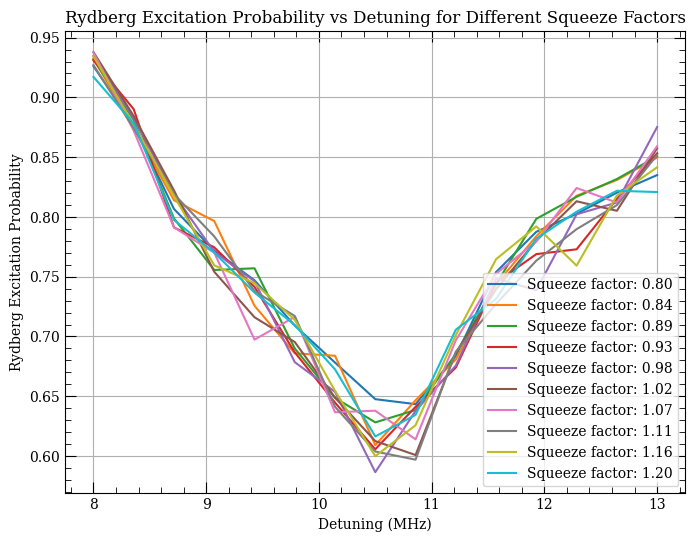

In [105]:
# sweep over squeezing factors and simulate interaction peak
squeeze_factors = np.linspace(0.8, 1.2, 10) # np.arange(0.0, 5, 0.5) #np.array([0.2, 0.5, 1.0, 2.0, 5.0]) # 
results = []

for factor in squeeze_factors:
    start_time = time.time()
    print(f"\nSimulating for squeeze factor = {factor:.2f}...")
    cfg.squeeze_factor = (factor, factor, 1.0)  # squeezing in (x, y, z) directions
    d, P = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    results.append((factor, d, P))
    print(f"time for simulation: {time.time() - start_time:.1f} s")

# Plot results
plt.figure(figsize=(8,6))
for factor, d, P in results:
    plt.plot(d/1e6, P, label=f"Squeeze factor: {factor:.2f}")
plt.xlabel("Detuning (MHz)")
plt.ylabel("Rydberg Excitation Probability")
plt.title("Rydberg Excitation Probability vs Detuning for Different Squeeze Factors")
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [131]:
temp = 2 * 1e-6
omega = TWOPI * 20e3 # angular frequency in rad/s
nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)
print(nbar)

1.623502915638321
